# Model 2 Fine Tuning
- Transfer learning with EfficientNetV2B0

**Name:** Abbinav Sankar Kailasam <br>
**Email:** abbinav.k-25@scds.saiuniversity.edu.in <br>
**Reg. No.:** 210200015 <br>
**School:** SCDS <br>

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Load the processed dataset from Model2_TL

In [3]:
# load numpy array from npy file
from numpy import load

X_train_std = load("/content/drive/MyDrive/Abbinav's Portfolio/DL_Course_Project/Models/X_train_std2.npy")
X_test_std = load("/content/drive/MyDrive/Abbinav's Portfolio/DL_Course_Project/Models/X_test_std2.npy")

y_train = load("/content/drive/MyDrive/Abbinav's Portfolio/DL_Course_Project/Models/y_train2.npy")
y_test = load("/content/drive/MyDrive/Abbinav's Portfolio/DL_Course_Project/Models/y_test2.npy")


In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (809, 299, 299, 3)
X_test_std_shape: (270, 299, 299, 3)


## Load the model from Model2_TL
- We apply fine tuning on this model

In [5]:
# Load the saved best model

model2_FT = keras.models.load_model("/content/drive/MyDrive/Abbinav's Portfolio/DL_Course_Project/Models/Model2_TL.h5")
model2_FT.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        0         ['rescaling_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalization_1[0][0]'

## Set first 35% layers as untrainable and rest as trainable

In [6]:
total_layers = len(model2_FT.layers)
freeze_layer = round(total_layers * 0.35)

for layer in model2_FT.layers[:freeze_layer]:
  layer.trainable = False

for layer in model2_FT.layers[freeze_layer:]:
  layer.trainable = True

## Compile, fit and evaluate the model
- Save the best weights while training

In [7]:
model2_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks2_FT = [
             keras.callbacks.ModelCheckpoint("bestFT2.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history2_FT = model2_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks2_FT)

Epoch 1/10
46/46 [==============================] - 46s 225ms/step - loss: 0.7424 - accuracy: 0.8022 - val_loss: 0.1093 - val_accuracy: 0.9753
Epoch 2/10
46/46 [==============================] - 5s 115ms/step - loss: 0.4660 - accuracy: 0.8777 - val_loss: 0.0957 - val_accuracy: 0.9753
Epoch 3/10
46/46 [==============================] - 6s 124ms/step - loss: 0.3247 - accuracy: 0.9066 - val_loss: 0.0312 - val_accuracy: 0.9877
Epoch 4/10
46/46 [==============================] - 5s 112ms/step - loss: 0.1555 - accuracy: 0.9574 - val_loss: 0.1831 - val_accuracy: 0.9630
Epoch 5/10
46/46 [==============================] - 6s 127ms/step - loss: 0.1669 - accuracy: 0.9478 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 6/10
46/46 [==============================] - 5s 115ms/step - loss: 0.1316 - accuracy: 0.9643 - val_loss: 0.0206 - val_accuracy: 0.9877
Epoch 7/10
46/46 [==============================] - 5s 112ms/step - loss: 0.0947 - accuracy: 0.9725 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch

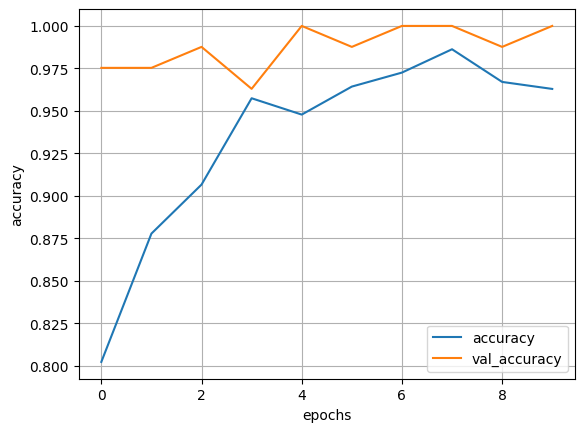

In [8]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history2_FT.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [9]:
testLoss_FT, testAccuracy_FT = model2_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

9/9 [==============================] - 7s 498ms/step - loss: 3.1430e-04 - accuracy: 1.0000
Test-loss: 0.000314, Test-accuracy: 1.000000


In [10]:
# Plugging best weights to the model to evaluate

model2_FT.load_weights("bestFT2.h5")

testLoss_FT, testAccuracy_FT = model2_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

9/9 [==============================] - 1s 85ms/step - loss: 0.0058 - accuracy: 0.9963
Test-loss: 0.005756, Test-accuracy: 0.996296


## Prediction of testing sample and inferences

In [11]:
y_proba = model2_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

9/9 [==============================] - 3s 97ms/step
[4 3 1 3 0 4 1 4 1 4 0 4 1 1 4 4 0 2 2 3 3 3 1 2 0 0 4 3 1 4 3 2 0 1 1 1 3
 3 1 0 0 0 1 0 0 3 1 1 4 3 0 2 3 2 2 3 4 2 1 0 3 3 0 2 0 2 3 2 4 3 3 2 4 2
 3 3 1 2 4 4 2 3 0 1 4 1 1 2 2 2 2 0 0 2 4 1 3 2 1 0 2 3 3 3 4 2 4 4 1 3 0
 2 4 3 1 0 3 2 1 0 1 3 1 1 1 0 2 2 1 0 4 2 2 2 1 1 1 2 0 2 1 1 1 4 3 0 0 2
 0 2 3 0 0 1 1 4 2 0 2 3 4 3 2 3 0 0 1 0 1 1 2 4 2 1 4 3 2 3 4 0 0 3 2 3 4
 0 3 2 3 4 3 0 3 3 0 2 0 3 3 0 3 2 1 1 3 0 2 4 0 0 4 0 3 4 1 2 2 3 1 2 3 4
 2 0 0 2 0 4 4 4 3 2 1 2 4 3 4 1 1 4 3 3 0 0 2 0 1 1 1 4 1 3 1 4 2 3 0 2 4
 2 1 0 2 4 2 1 4 0 1 0]


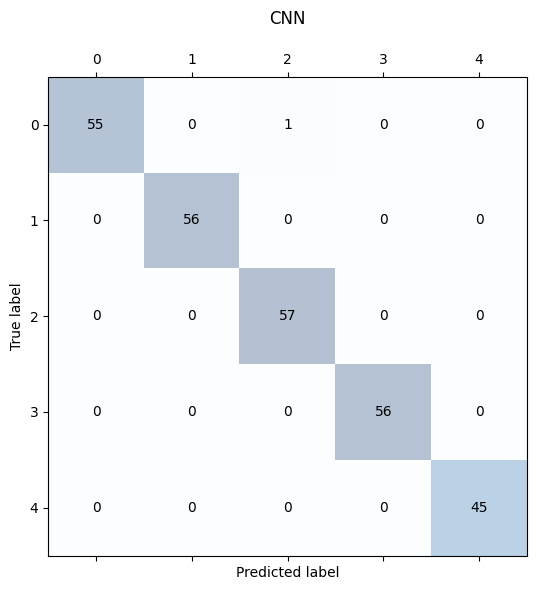

In [12]:
# Confusion matrix of testing data

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [13]:
# Calculating the precision, recall and f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  0.996360153256705
Recall:  0.9962962962962963
F1-score:  0.9962957160058609


## Save the final Fine-Tuned model

In [14]:
# Saves the best model obtained
model2_FT.save("/content/drive/MyDrive/Abbinav's Portfolio/DL_Course_Project/Models/Model2_FT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
